In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def model_function(x, a, b, c):
    return a * np.exp(b * x) + c

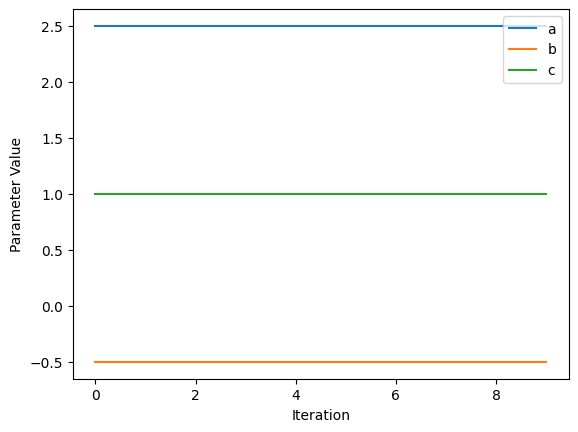

In [12]:
x_data = np.linspace(0, 10, 100)  # Example x values
y_data = model_function(x_data, 2.5, -0.5, 1.0)  # Example y values (with some noise)

# Initial guess for the parameters
initial_guess = (2.0, -0.4, 0.8)
params, covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess)
a, b, c = params  # Best-fit parameters

parameter_history = []  # Store parameter values at each step

initial_guess = (12.0, -5.4, 0.8)  # Reset initial guess

for _ in range(10):  # You can adjust the number of iterations as needed
    params, _ = curve_fit(model_function, x_data, y_data, p0=initial_guess, method = 'trf', maxfev=100)
    parameter_history.append(params)
    initial_guess = params  # Update initial guess for the next iteration

parameter_history = np.array(parameter_history)
param_names = ['a', 'b', 'c']

for i, param_name in enumerate(param_names):
    plt.plot(parameter_history[:, i], label=f'{param_name}')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()